<a href="https://colab.research.google.com/github/manikanta-781/Churn-modeling-in-neuralnetworks/blob/main/mnist_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [ ]:
(X_train,Y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

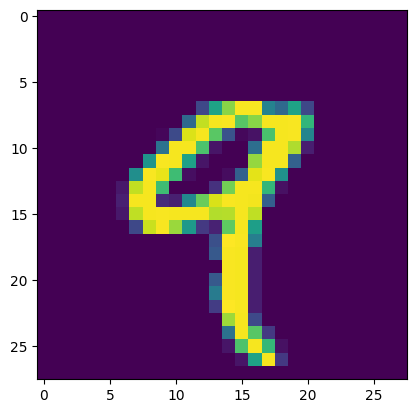

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[4])

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,Y_train,epochs=25,batch_size=10000,validation_split=0.2)

Epoch 1/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - accuracy: 0.9782 - loss: 0.0806 - val_accuracy: 0.9653 - val_loss: 0.1184
Epoch 2/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - accuracy: 0.9799 - loss: 0.0752 - val_accuracy: 0.9648 - val_loss: 0.1174
Epoch 3/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.9791 - loss: 0.0779 - val_accuracy: 0.9653 - val_loss: 0.1170
Epoch 4/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.9805 - loss: 0.0741 - val_accuracy: 0.9659 - val_loss: 0.1160
Epoch 5/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.9810 - loss: 0.0715 - val_accuracy: 0.9656 - val_loss: 0.1156
Epoch 6/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - accuracy: 0.9802 - loss: 0.0724 - val_accuracy: 0.9667 - val_loss: 0.1150
Epoch 7/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - accuracy: 0.9818 - loss: 0.0690 - val_accuracy: 0.9664 - val_loss: 0.1144
Epoch 8/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 0.9817 - loss: 0.0686 - val_accuracy: 0.9667 - val_loss:

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
y_pred_classes = np.argmax(model.predict(X_test), axis=-1)
accuracy_score(y_test, y_pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


0.9721

In [ ]:
import pickle
model = pickle.load(open('model.pkl','rb'))

In [ ]:
from PIL import Image
import numpy as np
image = Image.open('/content/hand written image.png')
grey_image = image.convert('L')
resized_image = grey_image.resize((28,28))
resized_image.show()
resized_image.save('resized_grey_image.jpg')
image_array = np.array(resized_image)/255.0
image_array = image_array.reshape(1,28,28)
predictions = model.predict(image_array)
print(np.argmax(predictions))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
3
